# Part A

## Question 1

In [4]:
Question1_Text = open("Data_1.txt","r").read()
print(Question1_Text)

Classification is the task of choosing the correct class label for a given input. In basic
classification tasks, each input is considered in isolation from all other inputs, and the set of labels is defined in advance. The basic classification task has a number of interesting variants. For example, in multiclass classification, each instance may be assigned multiple labels; in open-class classification, the set of labels is not defined in advance; and in sequence classification, a list of inputs are jointly classified.


### Word Tokenization

In [5]:
#using regex
import re

print("\nUsing regex: \n")
tokens=re.findall(r"\w+",Question1_Text)
print(tokens)

#using NLTK
import nltk
from nltk.tokenize import word_tokenize

print("\nUsing nltk word tokenize Function: \n")
wordtokenize_tokens = word_tokenize(Question1_Text)
print(wordtokenize_tokens)

#using Text blob function
import nltk
from textblob import TextBlob

print("\nUsing Textblob Function:")
tokens = TextBlob(Question1_Text).words
print(tokens)

#using spacy
import spacy

print("\nUsing Spacy:")
nlp = spacy.load("en_core_web_sm")
processed_nlp = nlp(Question1_Text)
tokens = [token.text for token in processed_nlp]
print(tokens)


Using regex: 

['Classification', 'is', 'the', 'task', 'of', 'choosing', 'the', 'correct', 'class', 'label', 'for', 'a', 'given', 'input', 'In', 'basic', 'classification', 'tasks', 'each', 'input', 'is', 'considered', 'in', 'isolation', 'from', 'all', 'other', 'inputs', 'and', 'the', 'set', 'of', 'labels', 'is', 'defined', 'in', 'advance', 'The', 'basic', 'classification', 'task', 'has', 'a', 'number', 'of', 'interesting', 'variants', 'For', 'example', 'in', 'multiclass', 'classification', 'each', 'instance', 'may', 'be', 'assigned', 'multiple', 'labels', 'in', 'open', 'class', 'classification', 'the', 'set', 'of', 'labels', 'is', 'not', 'defined', 'in', 'advance', 'and', 'in', 'sequence', 'classification', 'a', 'list', 'of', 'inputs', 'are', 'jointly', 'classified']

Using nltk word tokenize Function: 

['Classification', 'is', 'the', 'task', 'of', 'choosing', 'the', 'correct', 'class', 'label', 'for', 'a', 'given', 'input', '.', 'In', 'basic', 'classification', 'tasks', ',', 'each',

### Stop Word Removal

In [7]:
import nltk, string

text_lower = Question1_Text.lower()
wordtokens = wordtokenize_tokens

stopTokens = nltk.corpus.stopwords.words("english") + list(string.punctuation)
filteredTokens = []
filteredStopWords = []


for w in wordtokens:
    if w not in stopTokens :
        filteredTokens.append(w)
    else:
        if w not in filteredStopWords:
            filteredStopWords.append(w) # to prevent repeating output, i.e. [is,is]
        
print("Filtered Tokens: \n", filteredTokens)

print("\nStop Tokens filtered out: \n", sorted(filteredStopWords))

Filtered Tokens: 
 ['Classification', 'task', 'choosing', 'correct', 'class', 'label', 'given', 'input', 'In', 'basic', 'classification', 'tasks', 'input', 'considered', 'isolation', 'inputs', 'set', 'labels', 'defined', 'advance', 'The', 'basic', 'classification', 'task', 'number', 'interesting', 'variants', 'For', 'example', 'multiclass', 'classification', 'instance', 'may', 'assigned', 'multiple', 'labels', 'open-class', 'classification', 'set', 'labels', 'defined', 'advance', 'sequence', 'classification', 'list', 'inputs', 'jointly', 'classified']

Stop Tokens filtered out: 
 [',', '.', ';', 'a', 'all', 'and', 'are', 'be', 'each', 'for', 'from', 'has', 'in', 'is', 'not', 'of', 'other', 'the']


## Question 2

In [8]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer
from tabulate import tabulate

# Custom regex-based stemming function
def stem(word):
    regexp = r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment|tion)?$'
    stem, suffix = re.findall(regexp, word)[0]
    return stem

# Initialize stemmers
# Porter Stemmer
ps = PorterStemmer()
# Lancaster Stemmer
lancaster = LancasterStemmer()

# insert the output in the table
table = []
for word in filteredTokens:
    table.append([
        word,
        stem(word),
        ps.stem(word),
        lancaster.stem(word)
    ])

# Print table
headers = ["Original", "Regex Stem", "Porter Stem", "Lancaster Stem"]
print(tabulate(table, headers, tablefmt="grid"))


+----------------+--------------+---------------+------------------+
| Original       | Regex Stem   | Porter Stem   | Lancaster Stem   |
+================+==============+===============+==================+
| Classification | Classifica   | classif       | class            |
+----------------+--------------+---------------+------------------+
| task           | task         | task          | task             |
+----------------+--------------+---------------+------------------+
| choosing       | choos        | choos         | choos            |
+----------------+--------------+---------------+------------------+
| correct        | correct      | correct       | correct          |
+----------------+--------------+---------------+------------------+
| class          | clas         | class         | class            |
+----------------+--------------+---------------+------------------+
| label          | label        | label         | label            |
+----------------+--------------+-

## Question 3

In [ ]:
# Open and Read Text File
with open("Data_2.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Print Text File Content
print("Text from File:")
print(text)

import nltk
from nltk.tokenize import word_tokenize

# Tokenizing the Text
tokens = word_tokenize(text)

print("\nTokenized Words:")
print(tokens)

Text from File:
The big black dog barked at the white cat and chased away.

Tokenized Words:
['The', 'big', 'black', 'dog', 'barked', 'at', 'the', 'white', 'cat', 'and', 'chased', 'away', '.']


In [ ]:
# NLTK POS Tagging
print("\nNLTK POS Tagger Output:")
print(nltk.pos_tag(tokens))
print()

# TextBlob POS Tagging
from textblob import TextBlob
blob = TextBlob(text)
print("\nTextBlob POS Tagger Output:")
print(blob.tags)
print()

# Regex POS Tagging
patterns = [
     (r'.*ing$', 'VBG'),
     (r'.*ed$', 'VBD'),
     (r'.*es$', 'VBZ'),
     (r'.*ould$', 'MD'),
     (r'.*\'s$', 'NN$'),
     (r'.*s$', 'NNS'),
     (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),
     (r'.*', 'NN'),
     (r'^\d+$', 'CD'),
     (r'.*ing$', 'VBG'),
     (r'.*ment$', 'NN'),
     (r'.*ful$', 'JJ')
 ]

regexp_tagger = nltk.RegexpTagger(patterns)
tagger = nltk.tag.sequential.RegexpTagger(patterns)

print("\nRegex Tagger Output:")
print(tagger.tag(tokens))
print()


NLTK POS Tagger Output:
[('The', 'DT'), ('big', 'JJ'), ('black', 'JJ'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('white', 'JJ'), ('cat', 'NN'), ('and', 'CC'), ('chased', 'VBD'), ('away', 'RB'), ('.', '.')]


TextBlob POS Tagger Output:
[('The', 'DT'), ('big', 'JJ'), ('black', 'JJ'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('white', 'JJ'), ('cat', 'NN'), ('and', 'CC'), ('chased', 'VBD'), ('away', 'RB')]


Regex Tagger Output:
[('The', 'NN'), ('big', 'NN'), ('black', 'NN'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'NN'), ('the', 'NN'), ('white', 'NN'), ('cat', 'NN'), ('and', 'NN'), ('chased', 'VBD'), ('away', 'NN'), ('.', 'NN')]



['The', 'big', 'black', 'dog', 'barked', 'at', 'the', 'white', 'cat', 'and', 'chased', 'away']


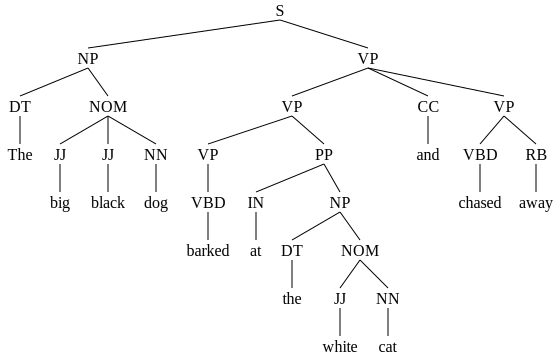

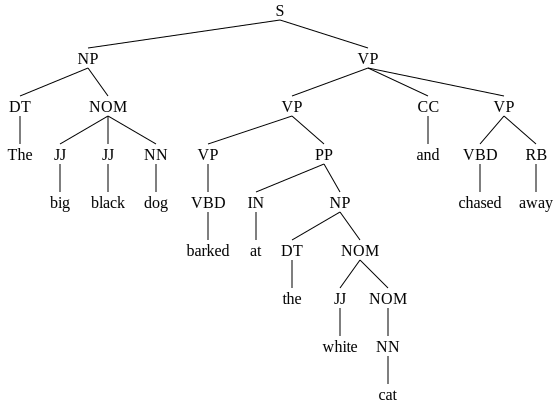

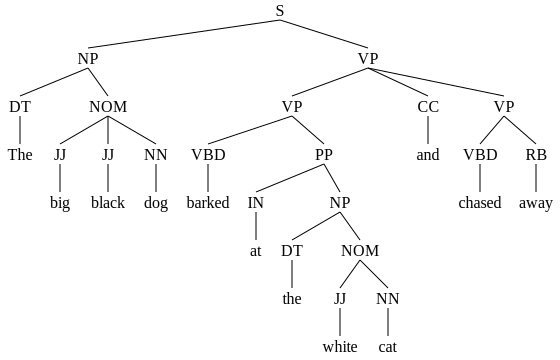

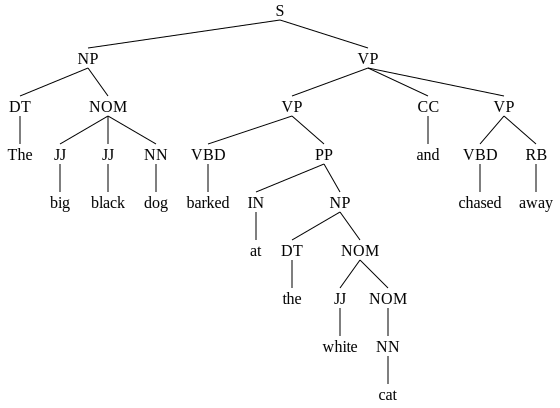

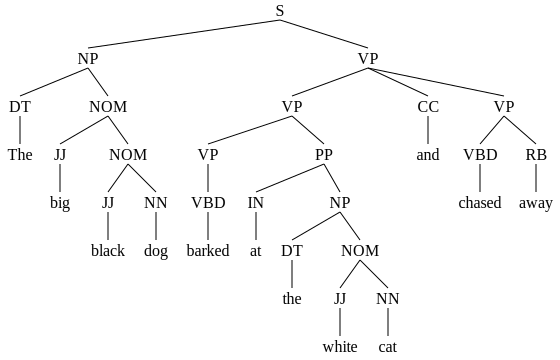

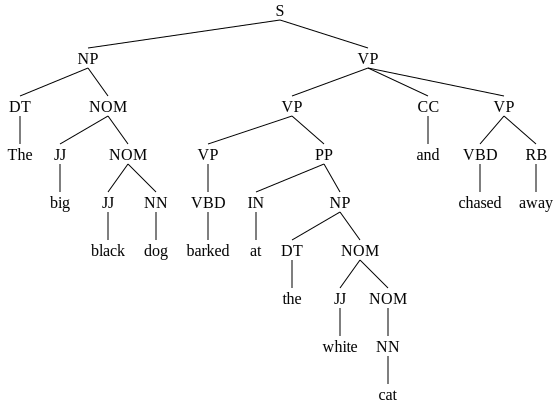

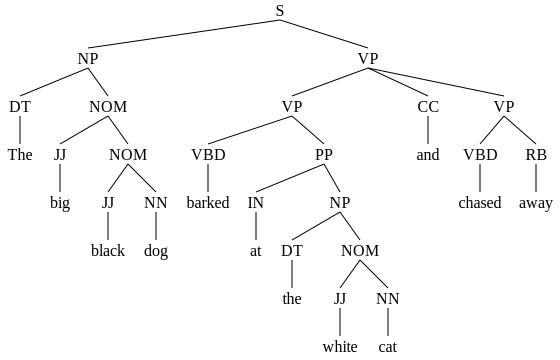

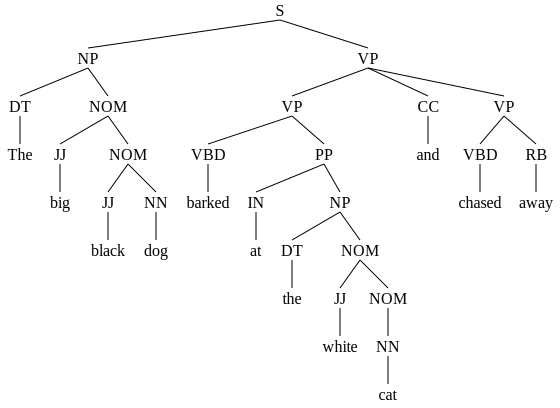

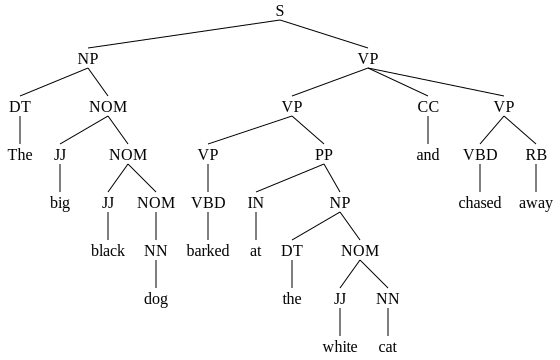

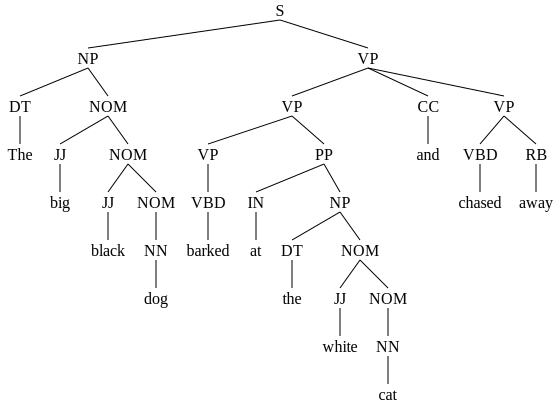

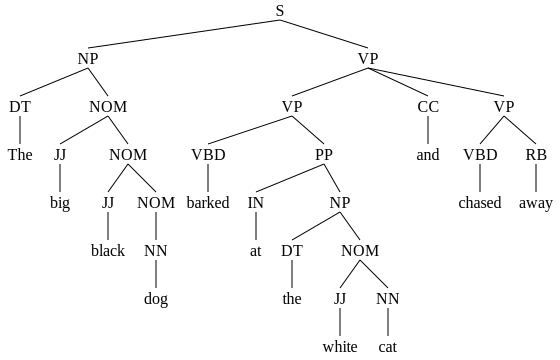

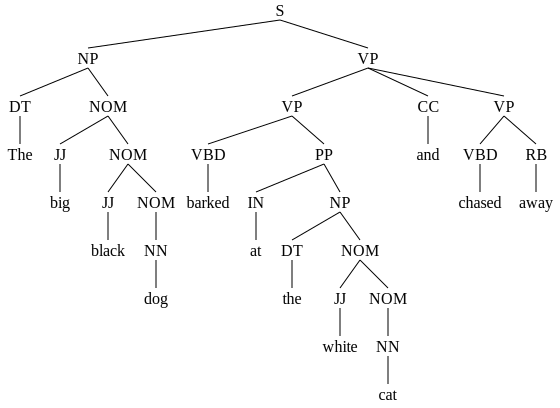

In [ ]:
# Define a Context-Free Grammar (CFG)
grammar = nltk.CFG.fromstring("""
    S -> NP VP
    NP -> DT NOM | DT NN
    NOM -> NN | JJ NOM | JJ NN | JJ JJ NN                              
    VP -> VBD | VBD PP | VBD RB | VP PP | VP CC VP                                                          
    PP -> IN NP
    DT -> 'The' | 'the'
    JJ -> 'big' | 'black' | 'white'
    NN -> 'dog' | 'cat'                            
    VBD -> 'barked' | 'chased'
    IN -> 'at'
    RB -> 'away'
    CC -> 'and'
""")

# Remove Punctuation Mark
if tokens[-1] == '.':
  tokens.pop()
print(tokens)

parser = nltk.ChartParser(grammar)
for tree in parser.parse(tokens):
  display(tree)


## Question 4

### Unsmoothed Bi-gram Model

In [ ]:
from collections import defaultdict

# Read corpus from file
with open('Data_3.txt', 'r') as file:
    lines = file.readlines()

training_corpus = []
test_sentence = ""
collect_training = False
collect_test = False

# Extract training corpus and test sentence based on ~~~~~ markers
for line in lines:
    stripped_line = line.strip()

    if stripped_line.startswith("~"):
        if not collect_training:
            collect_training = True  # Start collecting training corpus
        elif collect_training and not collect_test:
            collect_training = False  # End training, start test
            collect_test = True
        continue  # Skip ~~~~~ lines

    if collect_training and stripped_line.startswith("<s>") and stripped_line.endswith("</s>"):
        training_corpus.append(stripped_line)

    if collect_test and stripped_line.startswith("<s>") and stripped_line.endswith("</s>"):
        test_sentence = stripped_line

from collections import defaultdict
import math

# Preprocess and tokenize
def tokenize_corpus(corpus):
    tokens = []
    for sentence in corpus:
        words = sentence.strip().split()
        tokens.append(words)
    return tokens

tokenized_corpus = tokenize_corpus(training_corpus)

# Build unigram and bigram counts
unigram_counts = defaultdict(int)
bigram_counts = defaultdict(int)

for sentence in tokenized_corpus:
    for i in range(len(sentence) - 1):
        unigram_counts[sentence[i]] += 1
        bigram = (sentence[i], sentence[i+1])
        bigram_counts[bigram] += 1
    unigram_counts[sentence[-1]] += 1  # Last word

# Tokenize test sentence
test_tokens = test_sentence.strip().split()

# Compute bigram probability
def compute_bigram_probability(tokens, bigram_counts, unigram_counts):
    probability = 1.0
    for i in range(len(tokens) - 1):
        w1, w2 = tokens[i], tokens[i+1]
        bigram = (w1, w2)
        count_bigram = bigram_counts[bigram]
        count_unigram = unigram_counts[w1]

        if count_bigram == 0 or count_unigram == 0:
            probability = 0
            print(f"Bigram {bigram} not found. Probability = 0")
            break

        prob = count_bigram / count_unigram
        probability *= prob
        print(f"P({w2} | {w1}) = {count_bigram} / {count_unigram} = {prob:.4f}")
    
    return probability

# Calculate and print the final probability
sentence_probability = compute_bigram_probability(test_tokens, bigram_counts, unigram_counts)
print(f"\nFinal Sentence Probability: {sentence_probability:.6f}")

P(I | <s>) = 1 / 3 = 0.3333
P(read | I) = 1 / 1 = 1.0000
P(a | read) = 3 / 3 = 1.0000
P(different | a) = 1 / 3 = 0.3333
P(book | different) = 1 / 1 = 1.0000
P(by | book) = 1 / 3 = 0.3333
P(Danielle | by) = 1 / 1 = 1.0000
P(</s> | Danielle) = 1 / 1 = 1.0000

Final Sentence Probability: 0.037037


### Smoothed Bigram Model

In [ ]:
from collections import defaultdict

# Read corpus from file
with open('Data_3.txt', 'r') as file:
    lines = file.readlines()

training_corpus = []
test_sentence = ""
collect_training = False
collect_test = False

# Extract training corpus and test sentence based on ~~~~~ markers
for line in lines:
    stripped_line = line.strip()

    if stripped_line.startswith("~"):
        if not collect_training:
            collect_training = True  # Start collecting training corpus
        elif collect_training and not collect_test:
            collect_training = False  # End training, start test
            collect_test = True
        continue  # Skip ~~~~~ lines

    if collect_training and stripped_line.startswith("<s>") and stripped_line.endswith("</s>"):
        training_corpus.append(stripped_line)

    if collect_test and stripped_line.startswith("<s>") and stripped_line.endswith("</s>"):
        test_sentence = stripped_line

import math

# Preprocess and tokenize
def tokenize_corpus(corpus):
    tokens = []
    for sentence in corpus:
        words = sentence.strip().split()
        tokens.append(words)
    return tokens

tokenized_corpus = tokenize_corpus(training_corpus)

# Build unigram and bigram counts
unigram_counts = defaultdict(int)
bigram_counts = defaultdict(int)
vocabulary = set()

for sentence in tokenized_corpus:
    for i in range(len(sentence) - 1):
        unigram_counts[sentence[i]] += 1
        bigram = (sentence[i], sentence[i+1])
        bigram_counts[bigram] += 1
        vocabulary.add(sentence[i])
        vocabulary.add(sentence[i+1])
    unigram_counts[sentence[-1]] += 1

vocab_size = len(vocabulary)

# Tokenize test sentence
test_tokens = test_sentence.strip().split()

# Compute bigram probability with Laplace smoothing
def compute_smoothed_bigram_probability(tokens, bigram_counts, unigram_counts, vocab_size):
    probability = 1.0
    for i in range(len(tokens) - 1):
        w1, w2 = tokens[i], tokens[i+1]
        bigram = (w1, w2)

        count_bigram = bigram_counts[bigram]
        count_unigram = unigram_counts[w1]

        # Apply Laplace smoothing
        prob = (count_bigram + 1) / (count_unigram + vocab_size)
        probability *= prob

        print(f"P({w2} | {w1}) = ({count_bigram} + 1) / ({count_unigram} + {vocab_size}) = {prob:.6f}")
    
    return probability

# Calculate and print the final smoothed probability
sentence_probability = compute_smoothed_bigram_probability(test_tokens, bigram_counts, unigram_counts, vocab_size)
print(f"\nFinal Smoothed Sentence Probability: {sentence_probability:.10f}")

P(I | <s>) = (1 + 1) / (3 + 10) = 0.153846
P(read | I) = (1 + 1) / (1 + 10) = 0.181818
P(a | read) = (3 + 1) / (3 + 10) = 0.307692
P(different | a) = (1 + 1) / (3 + 10) = 0.153846
P(book | different) = (1 + 1) / (1 + 10) = 0.181818
P(by | book) = (1 + 1) / (3 + 10) = 0.153846
P(Danielle | by) = (1 + 1) / (1 + 10) = 0.181818
P(</s> | Danielle) = (1 + 1) / (1 + 10) = 0.181818

Final Smoothed Sentence Probability: 0.0000012244


# Part B

In [1]:
#import dataset
import pandas as pd
data = pd.read_csv("clean_tweet.csv")
data.head()

,Unnamed: 0,text,sentiment
0,0,text,0
1,1,rising cases of covid does not alarm me rising...,1
2,2,please vote for chicagoindiaresolution marking...,0
3,3,wishing all of you eidaladha hazrat ibrahim as...,1
4,4,daily coronavirus cases in india top for first...,1


## EDA

In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
from collections import defaultdict

### Data Overview

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134348 entries, 0 to 134347
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  134348 non-null  int64 
 1   text        134330 non-null  object
 2   sentiment   134348 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.1+ MB


,Unnamed: 0,text,sentiment
0,0,text,0
1,1,rising cases of covid does not alarm me rising...,1
2,2,please vote for chicagoindiaresolution marking...,0
3,3,wishing all of you eidaladha hazrat ibrahim as...,1
4,4,daily coronavirus cases in india top for first...,1


### check for na/nan/duplicates

In [4]:
data.isna().sum()

Unnamed: 0     0
text          18
sentiment      0
dtype: int64

In [5]:
data['text'].duplicated().any()

np.True_

### Target distribution

C:\Users\user\AppData\Local\Temp\ipykernel_23832\3373919947.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cnt_srs.index, y=cnt_srs.values, palette="coolwarm")


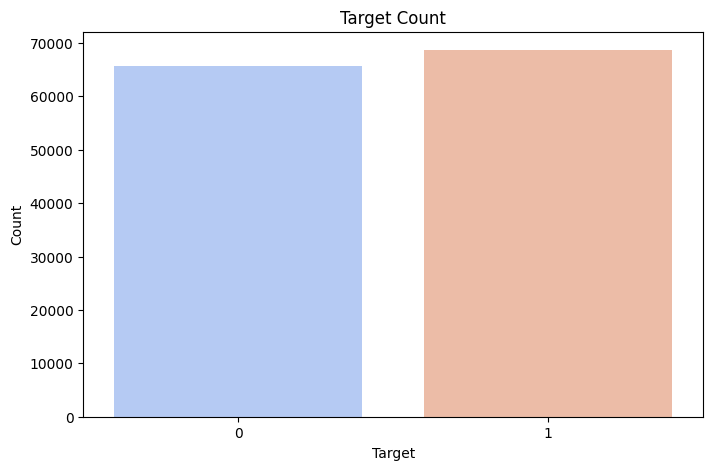

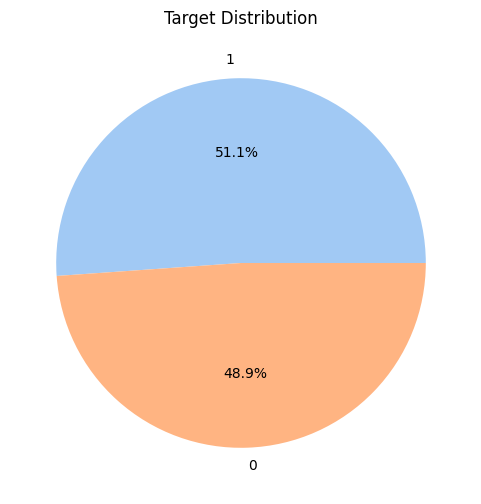

In [6]:
# Target Count (sentiment)
cnt_srs = data['sentiment'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, palette="coolwarm")
plt.title("Target Count")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

# Target Distribution (Pie Chart)
plt.figure(figsize=(6, 6))
plt.pie(cnt_srs, labels=cnt_srs.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Target Distribution")
plt.show()

### Word Cloud

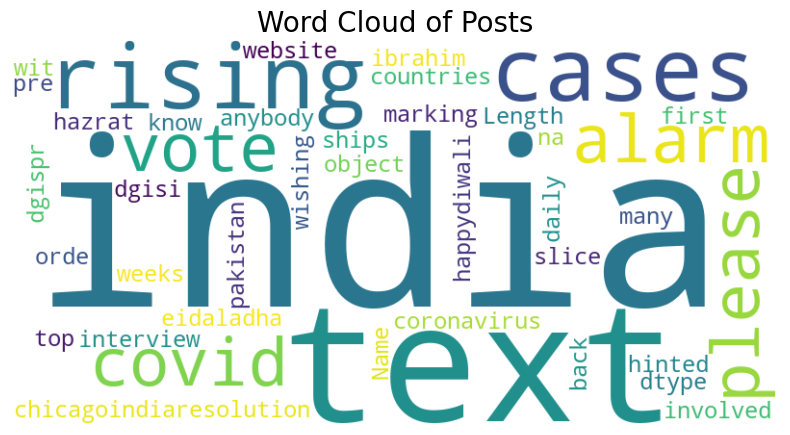

In [7]:
def plot_wordcloud(text, mask=None, max_words=200, title="Word Cloud"):
    """Generates and plots a word cloud using WordCloud's built-in stopwords."""
    stop_words = STOPWORDS  # Using WordCloud's default stopwords

    wordcloud = WordCloud(
        background_color="white",
        stopwords=stop_words,
        max_words=max_words,
        colormap="viridis",
        width=800,
        height=400,
        mask=mask
    ).generate(str(text))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title, fontsize=20)
    plt.axis("off")
    plt.show()

# Example usage
plot_wordcloud(data["text"], title="Word Cloud of Posts")

### Word frequency plot based on the sentiment

C:\Users\user\AppData\Local\Temp\ipykernel_23832\3159524491.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, y=df["word"], x=df["count"], palette=color)
C:\Users\user\AppData\Local\Temp\ipykernel_23832\3159524491.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, y=df["word"], x=df["count"], palette=color)


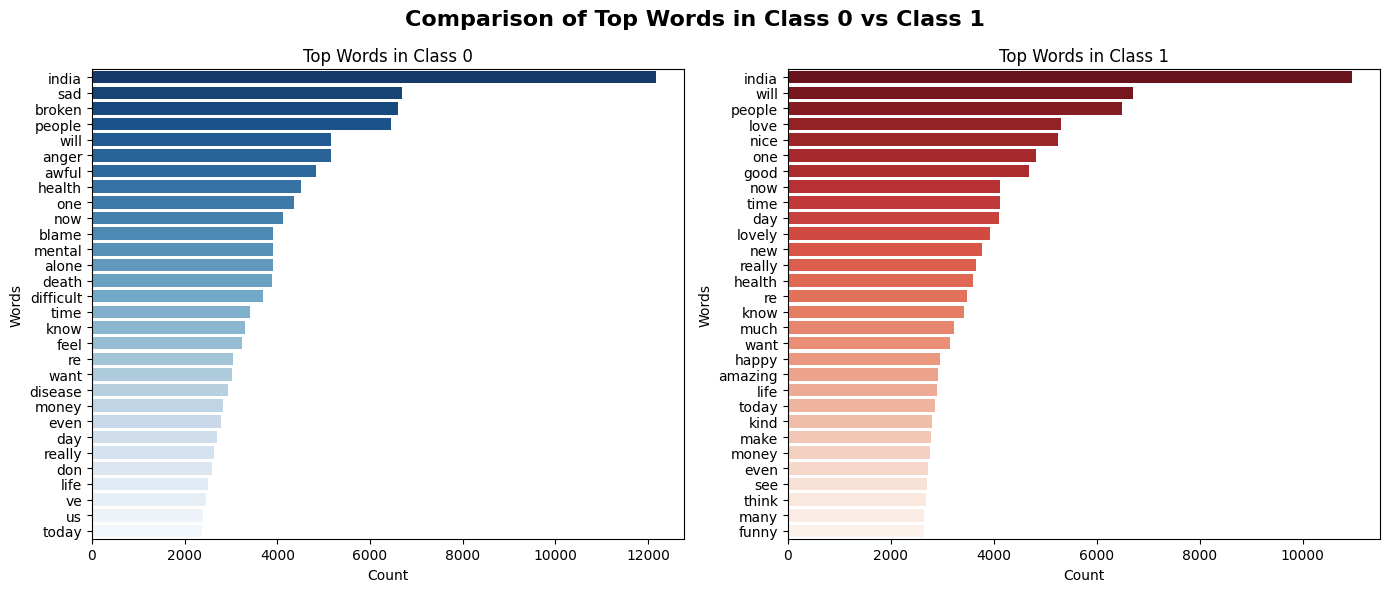

In [8]:

# Separate Classes
data_1 = data[data["sentiment"] == 1]
data_0 = data[data["sentiment"] == 0]

# N-gram generation function
def generate_ngrams(text, n_gram=1):
    if not isinstance(text, str):  # Convert non-strings to empty string
        text = ""
    
    tokens = [word for word in text.lower().split() if word not in STOPWORDS and word != ""]
    ngrams = zip(*[tokens[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# Function to count word frequency
def get_top_ngrams(df, top_n, n_gram):
    freq_dict = defaultdict(int)
    for sent in df["text"]:
        for word in generate_ngrams(sent, n_gram):
            freq_dict[word] += 1
    return pd.DataFrame(freq_dict.items(), columns=["word", "count"]).sort_values(by="count", ascending=False).head(top_n)

# Plot function
def plot_top_words(ax,df, title, color):
    sns.barplot(ax=ax, y=df["word"], x=df["count"], palette=color)
    ax.set_title(title)  # Set title using ax
    ax.set_xlabel("Count")  # Set x-label using ax
    ax.set_ylabel("Words")  # Set y-label using ax

# Get top word
top_words_0 = get_top_ngrams(data_0,30,1 )
top_words_1 = get_top_ngrams(data_1, 30, 1 )

# Create subplots for side-by-side visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.suptitle("Comparison of Top Words in Class 0 vs Class 1", fontsize=16, fontweight='bold')

# Plot results
plot_top_words(axes[0],top_words_0, "Top Words in Class 0", "Blues_r")
plot_top_words(axes[1],top_words_1, "Top Words in Class 1", "Reds_r")

plt.tight_layout()
plt.show()

### bigram frequency

C:\Users\user\AppData\Local\Temp\ipykernel_23832\3159524491.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, y=df["word"], x=df["count"], palette=color)
C:\Users\user\AppData\Local\Temp\ipykernel_23832\3159524491.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, y=df["word"], x=df["count"], palette=color)


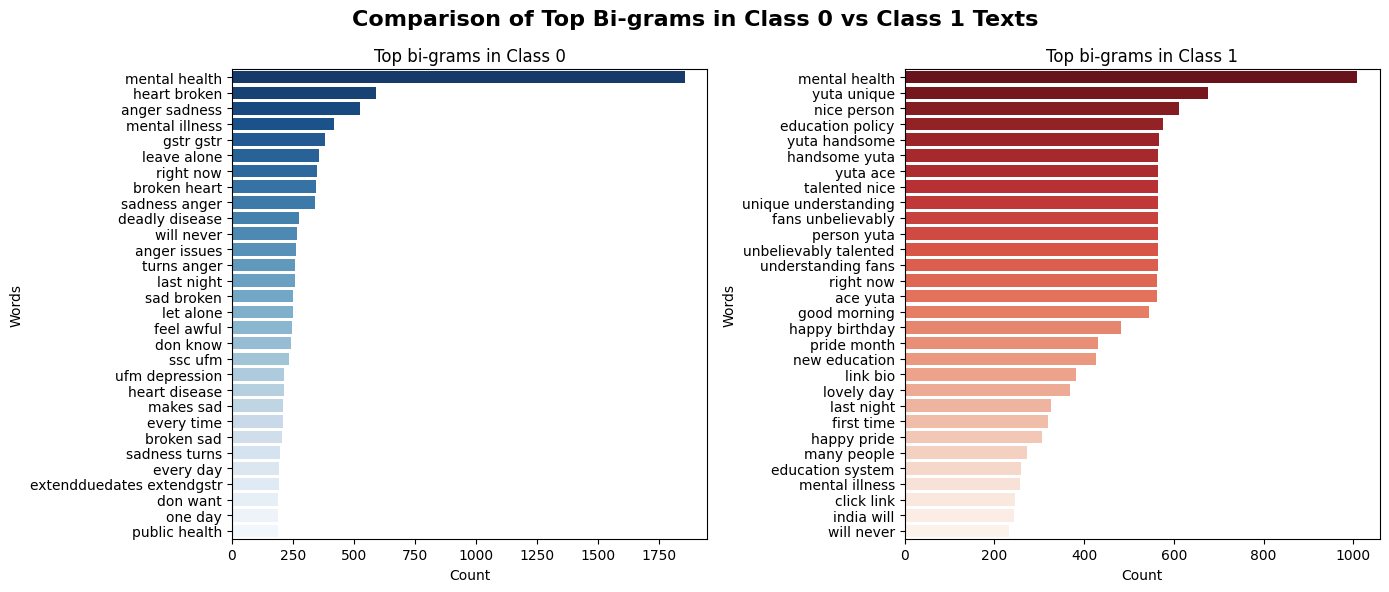

In [9]:

# Get top word
top_words_0 = get_top_ngrams(data_0,30,2 )
top_words_1 = get_top_ngrams(data_1, 30, 2 )

# Create subplots for side-by-side visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.suptitle("Comparison of Top Bi-grams in Class 0 vs Class 1 Texts", fontsize=16, fontweight='bold')

# Plot results
plot_top_words(axes[0],top_words_0, "Top bi-grams in Class 0", "Blues_r")
plot_top_words(axes[1],top_words_1, "Top bi-grams in Class 1", "Reds_r")

plt.tight_layout()
plt.show()

### Tri-gram frequency

C:\Users\user\AppData\Local\Temp\ipykernel_23832\3159524491.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, y=df["word"], x=df["count"], palette=color)
C:\Users\user\AppData\Local\Temp\ipykernel_23832\3159524491.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, y=df["word"], x=df["count"], palette=color)


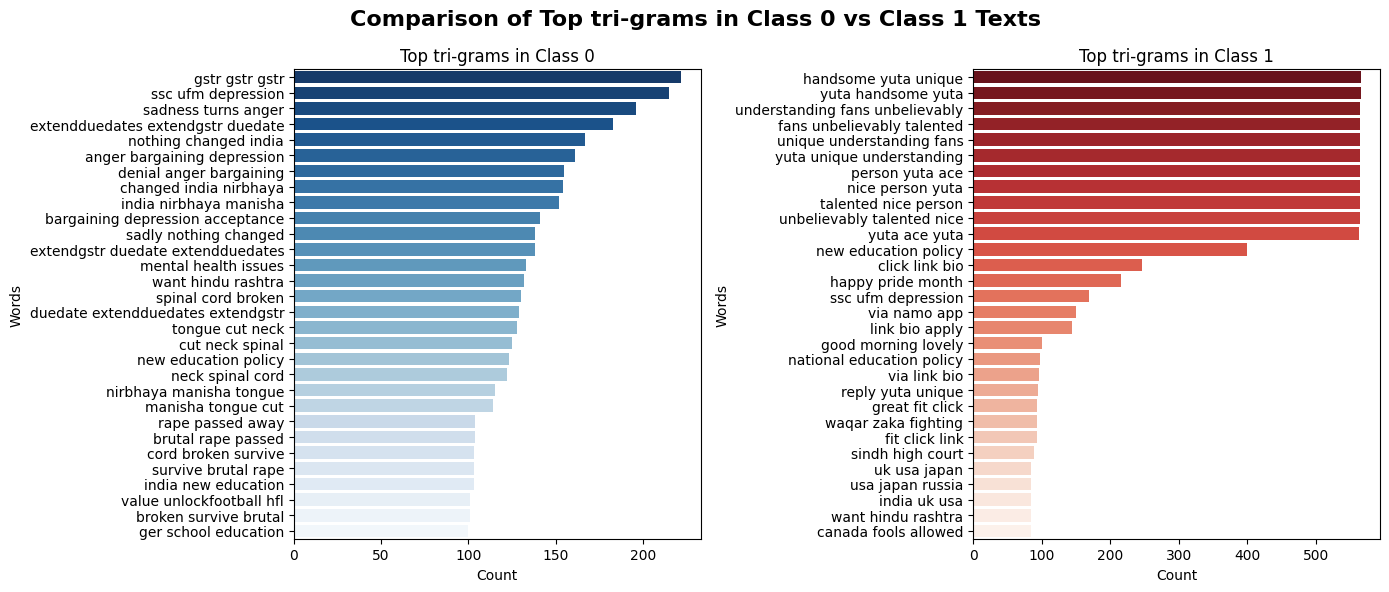

In [10]:

# Get top word
top_words_0 = get_top_ngrams(data_0,30,3 )
top_words_1 = get_top_ngrams(data_1, 30, 3 )

# Create subplots for side-by-side visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.suptitle("Comparison of Top tri-grams in Class 0 vs Class 1 Texts", fontsize=16, fontweight='bold')

# Plot results
plot_top_words(axes[0],top_words_0, "Top tri-grams in Class 0", "Blues_r")
plot_top_words(axes[1],top_words_1, "Top tri-grams in Class 1", "Reds_r")

plt.tight_layout()
plt.show()

### Abbreviation Checking

C:\Users\user\AppData\Local\Temp\ipykernel_23832\543334952.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=abbr_df['Abbreviation'], x=abbr_df['Count'], palette="viridis")


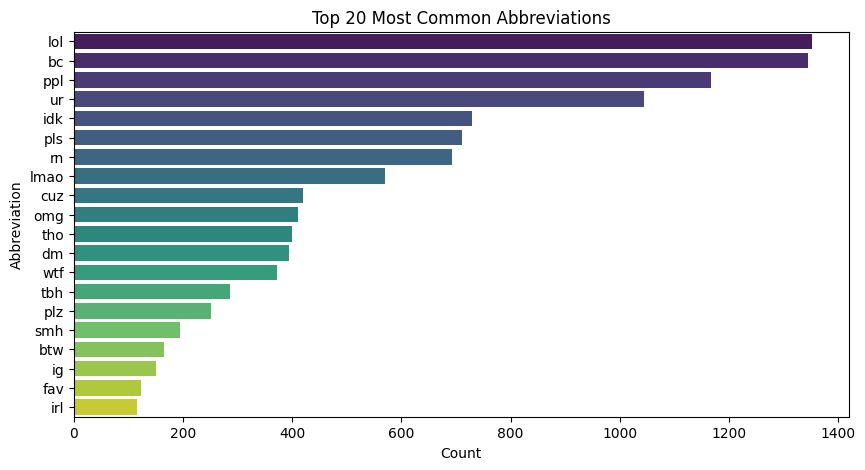

In [11]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Sample dataset (Replace this with your actual dataset)
# Define common abbreviations
abbreviations = [
    "u", "ur", "lol", "lmao", "rofl", "brb", "idk", "tbh", "smh", "wtf",
    "omg", "thx", "ty", "np", "yw", "fyi", "b4", "nvm", "gtg", "ttyl",
    "gr8", "bff", "cya", "imo", "imho", "jk", "afk", "irl", "gg", "wp",
    "btw", "dm", "rn", "tbh", "afaik", "asap", "fml", "ikr", "ily", "imho",
    "lmk", "ppl", "bc", "cuz", "tho", "y", "r", "k", "n", "w/", "w/o",
    "stfu", "hmu", "g2g", "ttyl", "wyd", "wym", "wbu", "wb", "np", "jk",
    "ikr", "ofc", "pls", "plz", "bday", "fav", "msg", "fb", "yt", "ig",
    "snap", "twt", "ftw", "icymi", "mfw", "tfw", "ftl", "roflmao"
]


    # Function to find abbreviations in text
def extract_abbreviations(text):
    if not isinstance(text, str):  # Check if the value is a string
        return []
    
    words = text.lower().split()  # Tokenize by space
    return [word for word in words if word in abbreviations]

    # Apply function to extract abbreviations
data['abbreviations'] = data['text'].apply(extract_abbreviations)

# Flatten list and count occurrences
all_abbreviations = [abbr for sublist in data['abbreviations'] for abbr in sublist]
abbr_counts = Counter(all_abbreviations)

# Convert to DataFrame
abbr_df = pd.DataFrame(abbr_counts.items(), columns=['Abbreviation', 'Count'])

# Sort by count
abbr_df = abbr_df.sort_values(by='Count', ascending=False).head(20)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(y=abbr_df['Abbreviation'], x=abbr_df['Count'], palette="viridis")
plt.title("Top 20 Most Common Abbreviations")
plt.xlabel("Count")
plt.ylabel("Abbreviation")
plt.show()


### Language Checking

In [12]:
import pandas as pd
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

# Ensure consistent results
DetectorFactory.seed = 42  

# Function to detect language
def detect_language(text):
    try:
        return detect(text) if pd.notna(text) else 'unknown'  # Handle NaN values
    except LangDetectException:
        return 'unknown'  # Handle cases where detection fails

# Apply language detection to text data
data['language'] = data['text'].apply(detect_language)

# Count occurrences of each language
language_counts = data['language'].value_counts().reset_index()
language_counts.columns = ['language', 'count']

# Display the table
print(language_counts)


   language   count
0        en  128702
1        it    1045
2        af     728
3        no     341
4        fr     299
5        da     294
6        tl     293
7        nl     283
8        cy     268
9        so     241
10       sv     237
11       id     221
12       et     204
13       ca     130
14       ro     125
15       pl     123
16       sw     108
17       es      93
18       fi      89
19       hr      88
20       sl      75
21       sk      61
22       pt      48
23       hu      40
24       tr      39
25       de      39
26       sq      37
27       cs      29
28       vi      24
29       lt      20
30  unknown      18
31       lv       6


## Pre-Processing

In [13]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re

# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

# sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split



# wordcloud
from wordcloud import WordCloud

In [14]:
#Drop missing values
data = data.dropna()
data.head()

,Unnamed: 0,text,sentiment,abbreviations,language
0,0,text,0,[],en
1,1,rising cases of covid does not alarm me rising...,1,[],en
2,2,please vote for chicagoindiaresolution marking...,0,[],en
3,3,wishing all of you eidaladha hazrat ibrahim as...,1,[],id
4,4,daily coronavirus cases in india top for first...,1,[],en


In [15]:
#Drop duplicates
data.drop_duplicates(subset =['text'])
data.head()

,Unnamed: 0,text,sentiment,abbreviations,language
0,0,text,0,[],en
1,1,rising cases of covid does not alarm me rising...,1,[],en
2,2,please vote for chicagoindiaresolution marking...,0,[],en
3,3,wishing all of you eidaladha hazrat ibrahim as...,1,[],id
4,4,daily coronavirus cases in india top for first...,1,[],en


In [16]:
# Remove HTML tags and special characters.
def removehtml_and_scharacters(data, column_name):
    data = data.copy()
    data[column_name] = data[column_name].apply(lambda x: re.sub(r'<.*?>', '', x))
    data[column_name] = data[column_name].apply(lambda x: re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", x))
    return data

data = removehtml_and_scharacters(data,'text')
data.head()

,Unnamed: 0,text,sentiment,abbreviations,language
0,0,text,0,[],en
1,1,rising cases of covid does not alarm me rising...,1,[],en
2,2,please vote for chicagoindiaresolution marking...,0,[],en
3,3,wishing all of you eidaladha hazrat ibrahim as...,1,[],id
4,4,daily coronavirus cases in india top for first...,1,[],en


In [17]:
# Drop rows where language is not 'en'
data = data[data['language'] == 'en']
data = data.reset_index(drop=True)

data.head()

,Unnamed: 0,text,sentiment,abbreviations,language
0,0,text,0,[],en
1,1,rising cases of covid does not alarm me rising...,1,[],en
2,2,please vote for chicagoindiaresolution marking...,0,[],en
3,4,daily coronavirus cases in india top for first...,1,[],en
4,5,sitting here india style watching the raindrop...,0,[],en


In [18]:
# Convert to lowercase
data['text'] = data['text'].str.lower()
data.head()

,Unnamed: 0,text,sentiment,abbreviations,language
0,0,text,0,[],en
1,1,rising cases of covid does not alarm me rising...,1,[],en
2,2,please vote for chicagoindiaresolution marking...,0,[],en
3,4,daily coronavirus cases in india top for first...,1,[],en
4,5,sitting here india style watching the raindrop...,0,[],en


In [19]:
#word tokenization 
data['text'] = data['text'].apply(nltk.word_tokenize)
data.head()

,Unnamed: 0,text,sentiment,abbreviations,language
0,0,[text],0,[],en
1,1,"[rising, cases, of, covid, does, not, alarm, m...",1,[],en
2,2,"[please, vote, for, chicagoindiaresolution, ma...",0,[],en
3,4,"[daily, coronavirus, cases, in, india, top, fo...",1,[],en
4,5,"[sitting, here, india, style, watching, the, r...",0,[],en


In [20]:
# abbreviation dictionary
abbreviation_dict = {
    "u": "you", "ur": "your", "lol": "laugh out loud", "lmao": "laughing my ass off",
    "rofl": "rolling on the floor laughing", "brb": "be right back", "idk": "I don't know",
    "tbh": "to be honest", "smh": "shaking my head", "wtf": "what the heck", "omg": "oh my god",
    "thx": "thanks", "ty": "thank you", "np": "no problem", "yw": "you're welcome",
    "fyi": "for your information", "b4": "before", "nvm": "never mind", "gtg": "got to go",
    "ttyl": "talk to you later", "gr8": "great", "bff": "best friends forever", "cya": "see you",
    "imo": "in my opinion", "imho": "in my humble opinion", "jk": "just kidding",
    "afk": "away from keyboard", "irl": "in real life", "gg": "good game", "wp": "well played",
    "btw": "by the way", "dm": "direct message", "rn": "right now", "afaik": "as far as I know",
    "asap": "as soon as possible", "fml": "f*** my life", "ikr": "I know right",
    "ily": "I love you", "lmk": "let me know", "ppl": "people", "bc": "because",
    "cuz": "because", "tho": "though", "y": "why", "r": "are", "k": "okay", "n": "and",
    "w/": "with", "w/o": "without", "stfu": "shut the f*** up", "hmu": "hit me up",
    "g2g": "got to go", "wyd": "what you doing", "wym": "what you mean", "wbu": "what about you",
    "wb": "welcome back", "ofc": "of course", "pls": "please", "plz": "please",
    "bday": "birthday", "fav": "favorite", "msg": "message", "fb": "Facebook",
    "yt": "YouTube", "ig": "Instagram", "snap": "Snapchat", "twt": "Twitter",
    "ftw": "for the win", "icymi": "in case you missed it", "mfw": "my face when",
    "tfw": "that feeling when", "ftl": "for the loss", "roflmao": "rolling on the floor laughing my ass off"
}

# Function to expand abbreviations
def expand_abbreviations(tokenized_text):
    return [abbreviation_dict.get(word, word) for word in tokenized_text]

# Expand abbreviations
data['text'] = data['text'].apply(expand_abbreviations)

# Display results
data.head()

,Unnamed: 0,text,sentiment,abbreviations,language
0,0,[text],0,[],en
1,1,"[rising, cases, of, covid, does, not, alarm, m...",1,[],en
2,2,"[please, vote, for, chicagoindiaresolution, ma...",0,[],en
3,4,"[daily, coronavirus, cases, in, india, top, fo...",1,[],en
4,5,"[sitting, here, india, style, watching, the, r...",0,[],en


In [21]:

#Stopword & punctuation removal
stop_words = set(stopwords.words('english'))
data['text'] = data['text'].apply(lambda tokens: [token for token in tokens if token not in stop_words])
data['text'] = data['text'].apply(lambda tokens: [token for token in tokens if token not in string.punctuation])
data.head()

,Unnamed: 0,text,sentiment,abbreviations,language
0,0,[text],0,[],en
1,1,"[rising, cases, covid, alarm, rising, death, r...",1,[],en
2,2,"[please, vote, chicagoindiaresolution, marking...",0,[],en
3,4,"[daily, coronavirus, cases, india, top, first,...",1,[],en
4,5,"[sitting, india, style, watching, raindrops, h...",0,[],en


In [22]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to get the correct WordNet POS tag
def get_wordnet_pos(word):
    """
    Converts NLTK POS tags to WordNet POS tags for better lemmatization.
    """
    tag = nltk.pos_tag([word])[0][1][0].upper()  # Extract first letter of POS tag
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)  # Default to NOUN

# Apply lemmatization
data['text'] = data['text'].apply(
    lambda tokens: [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
)

# Display first few rows
data.head()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Unnamed: 0,text,sentiment,abbreviations,language
0,0,[text],0,[],en
1,1,"[rise, case, covid, alarm, rise, death, rate, ...",1,[],en
2,2,"[please, vote, chicagoindiaresolution, mark, i...",0,[],en
3,4,"[daily, coronavirus, case, india, top, first, ...",1,[],en
4,5,"[sit, india, style, watch, raindrop, hit, big,...",0,[],en


In [23]:

# Join tokens back into a single string
data['text'] = data['text'].apply(' '.join)

In [24]:
#fit and transform the data
X =  data["text"]
#target variable
Y = data['sentiment']

#split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y ,test_size=0.2, random_state=42)
print("Loaded dataset with {} training samples, {} test samples".format(len(X_train), len(X_test)))

Loaded dataset with 102961 training samples, 25741 test samples


In [25]:
#TF-IDF Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit the vectorizer ONLY on training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform both training and test data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Logistic Regression

In [26]:
# ------------------- Import necessary libraries for model building and evaluation -------------------
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression model
from sklearn.metrics import accuracy_score, classification_report  # Import evaluation metrics

# ------------------- Initialize the Logistic Regression Model -------------------
# Logistic Regression is a statistical model used for binary and multi-class classification.
# It works by estimating the probability of an instance belonging to a particular class.
# The model uses a sigmoid (logistic) function to map inputs to probability values.
# 'max_iter=1000' increases the number of iterations to ensure convergence (avoids early stopping issues).
# 'random_state=42' ensures that results are reproducible (ensures consistent model behavior).
LR_classifier = LogisticRegression(max_iter=1000, random_state=42)

# ------------------- Train the Model using the TF-IDF Transformed Data -------------------
# The 'fit' function trains the model using training data (has features and labels).
# X_train_tfidf: The training dataset after TF-IDF vectorization (numerical representation of text).
# Y_train: The corresponding labels (actual categories for training samples).
# During training, the model:
# - Learns the relationships between word importance (TF-IDF scores) and class labels.
# - Computes optimal weights (coefficients) to separate classes effectively.
# - Uses optimization techniques (such as Gradient Descent) to minimize classification errors.
LR_classifier.fit(X_train_tfidf, Y_train)

# ------------------- Make Predictions on the Test Set -------------------
# The 'predict' function applies the trained model to unseen test data (X_test_tfidf).
# It uses the learned weight coefficients to assign probabilities to each class.
# The class with the highest probability is selected as the predicted label.
# Y_pred stores the model’s predicted classifications for the test dataset.
Y_pred = LR_classifier.predict(X_test_tfidf)

# ------------------- Evaluate the Model Performance -------------------
# The performance of the model is evaluated using accuracy and a classification report.
# Accuracy Score:
# - Measures the percentage of correctly classified instances.
# - Formula: Accuracy = (Correct Predictions / Total Predictions).
accuracy = accuracy_score(Y_test, Y_pred)

# Classification Report:
# - Provides a detailed performance breakdown for each class.
# - Includes Precision, Recall, and F1-score, which are essential for text classification.
# - Precision: Proportion of true positive predictions out of all positive predictions.
# - Recall: Proportion of true positive predictions out of actual positive instances.
# - F1-score: Harmonic mean of Precision and Recall, balancing both metrics.
report = classification_report(Y_test, Y_pred)

# ------------------- Display the Results -------------------
# Prints the accuracy score (rounded to 4 decimal places for clarity).
# Prints the classification report showing per-class performance.
print(f'Accuracy: {accuracy:.4f}')
print(f'Classification Report:\n{report}')

Accuracy: 0.8934
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     12620
           1       0.91      0.88      0.89     13121

    accuracy                           0.89     25741
   macro avg       0.89      0.89      0.89     25741
weighted avg       0.89      0.89      0.89     25741



In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

param_grid ={
        'penalty': ['l1', 'l2'],
        'C': np.logspace(-1, 1, 10),
        'solver': ['liblinear', 'saga']
        }

random_search = RandomizedSearchCV(LR_classifier, param_grid, cv=3, 
                                   scoring='accuracy', n_jobs=-1, n_iter=10, random_state=42)
random_search.fit(X_train_tfidf, Y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

best_model = LogisticRegression(**random_search.best_params_)
best_model.fit(X_train_tfidf, Y_train)

# Predict & Evaluate
y_pred = best_model.predict(X_test_tfidf)
accuracy = accuracy_score(Y_test, y_pred)
print(f"Optimized Model Accuracy: {accuracy:.4f}")

Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': np.float64(0.774263682681127)}
Best Accuracy: 0.9039442051704952
Optimized Model Accuracy: 0.9044


In [29]:
# Logistic Regression Model Evaluation
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
# Model Evaluation using Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Model Evaluation using Classification Report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

Accuracy: 0.9044

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     12620
           1       0.91      0.88      0.89     13121

    accuracy                           0.89     25741
   macro avg       0.89      0.89      0.89     25741
weighted avg       0.89      0.89      0.89     25741



## Naive Bayes

### model building

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Initialize the Naïve Bayes classifier
nb_model = MultinomialNB()

# 2. Train the model on the training data
nb_model.fit(X_train_tfidf, Y_train)

# 3. Make predictions on the test set
Y_pred = nb_model.predict(X_test_tfidf)

# 4. Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred, output_dict=True)  # Convert report to dictionary

# Extract relevant metrics
precision = report["weighted avg"]["precision"]
recall = report["weighted avg"]["recall"]
f1_score = report["weighted avg"]["f1-score"]

# Store them in a dictionary
metrics = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1_score}

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))



Accuracy: 0.7925

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79     12620
           1       0.80      0.80      0.80     13121

    accuracy                           0.79     25741
   macro avg       0.79      0.79      0.79     25741
weighted avg       0.79      0.79      0.79     25741



### Model Tuning with GridSearch

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Define parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 4.5, 5.0],  # Smoothing parameter (Laplace/Lidstone)
    'fit_prior': [True, False]  # Whether to learn class priors from data
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    MultinomialNB(),
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Optimize for accuracy
    n_jobs=-1  # Use all CPU cores for faster processing
)

# Fit GridSearchCV on training data
grid_search.fit(X_train_tfidf, Y_train)

# Retrieve the best model and its parameters
best_nb_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print best parameters
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Print the best model
print("\nBest Naïve Bayes Model Configuration:")
print(best_nb_model)

# Evaluate on test data
Y_pred = best_nb_model.predict(X_test_tfidf)
test_accuracy = accuracy_score(Y_test, Y_pred)

print(f"\nTest Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

Best Parameters: {'alpha': 5.0, 'fit_prior': False}
Best Cross-Validation Accuracy: 0.8047

Best Naïve Bayes Model Configuration:
MultinomialNB(alpha=5.0, fit_prior=False)

Test Accuracy: 0.8023

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81     12620
           1       0.83      0.77      0.80     13121

    accuracy                           0.80     25741
   macro avg       0.80      0.80      0.80     25741
weighted avg       0.80      0.80      0.80     25741



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform training data; transform test data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on test data
Y_pred = rf_model.predict(X_test_tfidf)

Accuracy: 0.8939

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89     13118
           1       0.90      0.89      0.90     13748

    accuracy                           0.89     26866
   macro avg       0.89      0.89      0.89     26866
weighted avg       0.89      0.89      0.89     26866



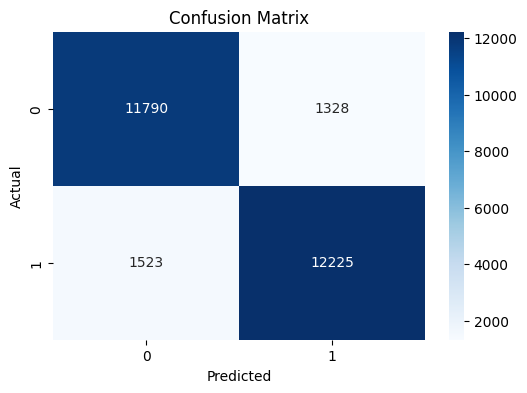

In [ ]:
# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

In [ ]:
# Base model
rf = RandomForestClassifier(random_state=42)

# Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

In [ ]:
# Fit on TF-IDF transformed training data
grid_search.fit(X_train_tfidf, Y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  46.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  46.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  47.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  54.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  55.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  55.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  31.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2,

/Users/fuyu/Library/Python/3.10/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  14.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.0s
[CV] END max_depth=10, max_features=sq

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [ ]:
# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best accuracy score
print("Best CV Accuracy:", grid_search.best_score_)

# Best model
best_rf_model = grid_search.best_estimator_

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best CV Accuracy: 0.8921499068330402


Test Accuracy after Tuning: 0.8948112856398421

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89     13118
           1       0.90      0.89      0.90     13748

    accuracy                           0.89     26866
   macro avg       0.89      0.89      0.89     26866
weighted avg       0.89      0.89      0.89     26866



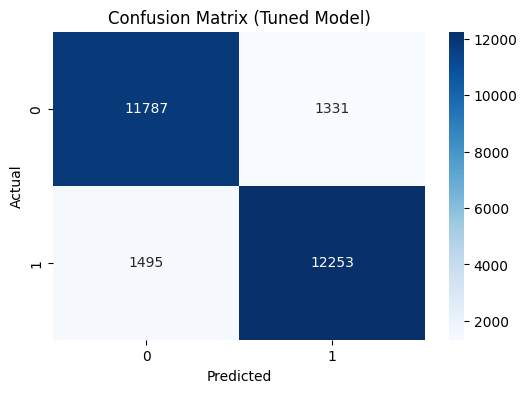

In [ ]:
# Predict with the best model
Y_pred_best = best_rf_model.predict(X_test_tfidf)

# Evaluate
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("Test Accuracy after Tuning:", accuracy_score(Y_test, Y_pred_best))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_best))

# Confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=best_rf_model.classes_, yticklabels=best_rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned Model)')
plt.show()

## SVM

### Model Building

In [35]:
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report
)

lsvc = LinearSVC(
    C=1,                      # Fix reasonable value
    penalty='l2',             # Standard SVM configruation
    class_weight='balanced',  # Handle imbalance
    max_iter=5000,        
    random_state=123
)

# Train model with training data
lsvc.fit(X_train_tfidf, Y_train)

# Predict remaining validation data
Y_pred = lsvc.predict(X_test_tfidf)

# Calculate evaluation metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# Print evaluation results
print("\nEvaluation Results:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))


Evaluation Results:
Accuracy : 0.8969
Precision: 0.9164
Recall   : 0.8777
F1-Score : 0.8966

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90     12620
           1       0.92      0.88      0.90     13121

    accuracy                           0.90     25741
   macro avg       0.90      0.90      0.90     25741
weighted avg       0.90      0.90      0.90     25741



### Model Tuning

In [36]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],             # Try values for regularization strength
    'penalty': ['l1', 'l2'],       # Regularization types to test
    'max_iter': [1000, 5000, 10000]  # Number of iterations to test
}

# Initialize LinearSVC model
lsvc = LinearSVC(random_state=123)

# Perform GridSearchCV
grid_search = GridSearchCV(
    lsvc,                     # Model to tune
    param_grid=param_grid,    # Hyperparameter grid to search
    cv=5,                     # 5-fold cross-validation
    n_jobs=-1,                # Use all available CPU cores
    verbose=1                 # Show progress of the search
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_tfidf, Y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}\n")

# Train with the best parameters
best_lsvc = grid_search.best_estimator_

# Predict using the best model
Y_pred = best_lsvc.predict(X_test_tfidf)

# Calculate evaluation metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# Print evaluation results
print("\nEvaluation Results:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Hyperparameters: {'C': 1, 'max_iter': 1000, 'penalty': 'l1'}


Evaluation Results:
Accuracy : 0.8999
Precision: 0.9148
Recall   : 0.8862
F1-Score : 0.9003

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90     12620
           1       0.91      0.89      0.90     13121

    accuracy                           0.90     25741
   macro avg       0.90      0.90      0.90     25741
weighted avg       0.90      0.90      0.90     25741

